# Project Brief

Solving this assignment will give you an idea about how real business problems are solved using EDA. In this case study, apart from applying the techniques you have learnt in EDA, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

# Business Objectives

This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface.

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'.

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.

# Exploratory Data Analysis(EDA) on loan dataset

## 1. Data Collection

## Importing packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading Loan Dataset 

In [3]:
df = pd.read_csv("loan.csv")
df.columns

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
df.shape

(39717, 111)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [7]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


## 2. Data Cleaning
    a. Need to fix rows and columns
    b. Need to fix missing values
    c. Need to standardise values
    d. Need to fix invalid values
    e. Need to filter data

In [8]:
# Removing columns which has all null values
df.dropna(how='all',axis = 1 , inplace = True)

In [9]:
# Removing having all values as same. So not adding any importance in analysis
# Removing columns having most of as unique values
dropColList = ['delinq_amnt', 'acc_now_delinq', 'application_type','policy_code', 'pymnt_plan','initial_list_status',
               'chargeoff_within_12_mths', 'tax_liens','collections_12_mths_ex_med','desc','member_id', 'id', 'url', 
               'next_pymnt_d','mths_since_last_record','mths_since_last_delinq','emp_title']
df = df.drop(dropColList, axis=1)

In [10]:
# Check percentage of missing data
round((100*df.isnull().sum() / len(df)).sort_values(ascending = False), 2)

emp_length                 2.71
pub_rec_bankruptcies       1.75
last_pymnt_d               0.18
revol_util                 0.13
title                      0.03
last_credit_pull_d         0.01
annual_inc                 0.00
zip_code                   0.00
purpose                    0.00
loan_status                0.00
issue_d                    0.00
verification_status        0.00
funded_amnt                0.00
addr_state                 0.00
sub_grade                  0.00
grade                      0.00
installment                0.00
int_rate                   0.00
term                       0.00
funded_amnt_inv            0.00
home_ownership             0.00
delinq_2yrs                0.00
dti                        0.00
earliest_cr_line           0.00
last_pymnt_amnt            0.00
collection_recovery_fee    0.00
recoveries                 0.00
total_rec_late_fee         0.00
total_rec_int              0.00
total_rec_prncp            0.00
total_pymnt_inv            0.00
total_py

### Identify Categorical Columns

In [11]:
data = []
for row in df.columns.tolist():
    data.append({'column': row, 'count': len(df[row].unique())})

In [12]:
cat_data = pd.DataFrame(data).sort_values('count')

In [13]:
cat_data.head

<bound method NDFrame.head of                      column  count
3                      term      2
13              loan_status      3
11      verification_status      3
39     pub_rec_bankruptcies      4
23                  pub_rec      5
9            home_ownership      5
6                     grade      7
21           inq_last_6mths      9
19              delinq_2yrs     11
8                emp_length     12
14                  purpose     14
7                 sub_grade     35
22                 open_acc     40
17               addr_state     50
12                  issue_d     55
26                total_acc     82
36             last_pymnt_d    102
38       last_credit_pull_d    107
4                  int_rate    371
20         earliest_cr_line    526
16                 zip_code    823
0                 loan_amnt    885
1               funded_amnt   1041
25               revol_util   1090
27                out_prncp   1137
28            out_prncp_inv   1138
33       total_rec_late_f

### Creating some business related columns

In [31]:
df["Fully_Paid"] = df["loan_status"].apply(lambda x: 1 if x == 'Fully Paid' else 0)

In [32]:
df["Charged_Off"] = df["loan_status"].apply(lambda x: 1 if x == 'Charged Off' else 0)

In [36]:
def makeIncRatioRanges(x):
    if (x > 25.0):
        return 'veryhigh'
    elif (x > 16.0) & (x < 25.0):
        return 'high'
    elif (x > 9.6) & (x < 16.0):
        return 'medium'
    elif (x > 0.0) & (x < 9.6):
        return 'low'
    else:
        return 'verylow'
df["loan_inc_ratio_range"] = df["loan_inc_ratio"].apply(lambda x: makeIncRatioRanges(x))
df.loan_inc_ratio_range.value_counts()

high        10075
medium       9760
low          9653
veryhigh     9494
verylow       735
Name: loan_inc_ratio_range, dtype: int64

In [40]:
def makeRanges(x):
    if (x > 30.0):
        return '30 or more'
    elif (x > 25.0) & (x < 30.0):
        return '25 to 30'
    elif (x > 20.0) & (x < 25.0):
        return '20 to 25'
    elif (x > 15.0) & (x < 20.0):
        return '15 to 20'
    elif (x > 10.0) & (x < 15.0):
        return '10 to 15'
    elif (x > 5.0) & (x < 10.0):
        return '05 to 10'
    else:
        return '0 to 5'
df["dti_category"] = df["dti"].apply(lambda x: makeRanges(x))
df["dti_category"].value_counts()

10 to 15    9863
15 to 20    9072
05 to 10    8042
20 to 25    6813
0 to 5      5251
25 to 30     676
Name: dti_category, dtype: int64

### Updating derived columns

In [14]:
#updating term variable(removing months)
df.term = df.term.apply(lambda x: int(x.split(' ')[1]))

In [15]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [16]:
#updating int_rate columns(removing % using rstrip)
df['int_rate'] = df['int_rate'].str.rstrip('%')

In [17]:
#updating revol_util columns(removing % using rstrip)
df['revol_util'] = df['revol_util'].str.rstrip('%')

In [18]:
#updating emp_length columns(removing years using rstrip, replacing 10+ as 10 and <1 as 0)
df['emp_length'] = df['emp_length'].str.rstrip('years ')
df['emp_length'].replace({'10+': '10'}, inplace=True)
df['emp_length'] = df['emp_length'].apply(lambda x: '0' if x == '< 1' else x)

In [19]:
df['issue_d_month'], df['issue_d_year'] = df['issue_d'].str.split('-').str
df['last_credit_pull_d_month'], df['last_credit_pull_d_year'] = df['last_credit_pull_d'].str.split('-').str
df['last_pymnt_d_month'], df['last_pymnt_d_year'] = df['last_pymnt_d'].str.split('-').str
df['earliest_cr_line_month'], df['earliest_cr_line_year'] = df['earliest_cr_line'].str.split('-').str

In [20]:
df['issue_d_year'] = '20' + df['issue_d_year']

In [21]:
df['annual_inc']

0         24000.00
1         30000.00
2         12252.00
3         49200.00
4         80000.00
5         36000.00
6         47004.00
7         48000.00
8         40000.00
9         15000.00
10        72000.00
11        75000.00
12        30000.00
13        15000.00
14       100000.00
15        28000.00
16        42000.00
17       110000.00
18        84000.00
19        77385.19
20        43370.00
21       105000.00
22        50000.00
23        50000.00
24        76000.00
25        92000.00
26        60000.00
27        50004.00
28       106000.00
29        25000.00
           ...    
39687     75000.00
39688    145000.00
39689     20000.00
39690     60000.00
39691     52200.00
39692    250000.00
39693     13500.00
39694    150000.00
39695     95000.00
39696     48000.00
39697     27376.00
39698     73000.00
39699     32000.00
39700      8000.00
39701     74000.00
39702     30000.00
39703    200000.00
39704     25000.00
39705    120000.00
39706    180000.00
39707    180000.00
39708     48

### Updated column datatype

In [22]:
columnList = ['loan_amnt', 'funded_amnt','funded_amnt_inv', 'installment', 'annual_inc', 'emp_length', 'dti', 
              'revol_bal', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
              'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'int_rate','revol_util']
df[columnList] = df[columnList].astype(np.float)
columnList = ['total_acc', 'term', 'issue_d_year']
df[columnList] = df[columnList].astype(np.int)
columnList = ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state',
              'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies']
df[columnList] = df[columnList].apply(lambda x: x.astype('category'))

In [23]:
# Calculation of profit and loss 
df['PnL']=(df['total_pymnt']-df['funded_amnt'])*100/df['funded_amnt']

In [21]:
df['loan_inc_ratio'] = df.funded_amnt*100/df.annual_inc
df['annual_inc_thousands'] = df['annual_inc'] / 1000
df['annual_inc_thousands'].describe()

count    39717.000000
mean        68.968926
std         63.793766
min          4.000000
25%         40.404000
50%         59.000000
75%         82.300000
max       6000.000000
Name: annual_inc_thousands, dtype: float64

In [25]:
#Removing current loan status as it's not needed in the analysis
df = df[df.loan_status !='Current']
df = df.loc[:,df.nunique()!=1]

In [26]:
df["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Current            0
Name: loan_status, dtype: int64

## 3. Data Visualisation

### Univariate Analysis

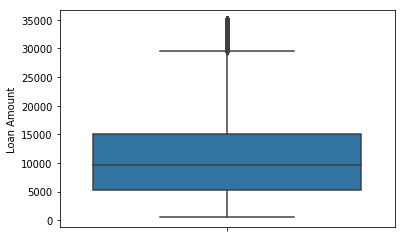

In [27]:
sns.boxplot( y=df["loan_amnt"] )
plt.ylabel('Loan Amount')
plt.show()

Observation: The loan amount varies from 0 to 35,000 having mean of 10,000

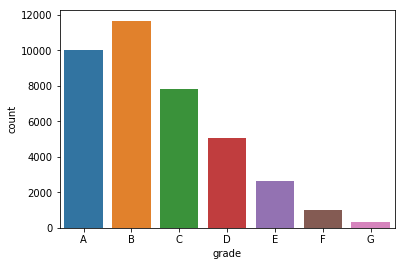

In [28]:
sns.countplot(x='grade', data=df)
plt.show()

Observation: Most of the loans have grade of A and B and also Grade B is the mostly issued loan.

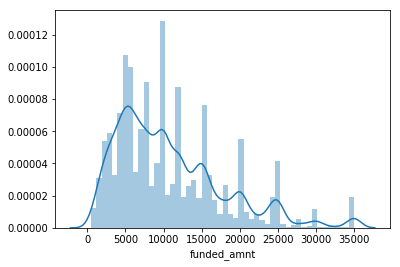

In [29]:
sns.distplot(df['funded_amnt'])
plt.show()

Observation: Funded amount is left skewed. Most of the loan amount given is 10,000 and next high frequent loan is 5000 and around 5K

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


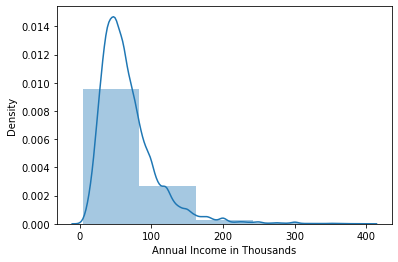

In [27]:
sns.distplot(df[df['annual_inc_thousands'] < 400]['annual_inc_thousands'], bins=5)
plt.xlabel('Annual Income in Thousands')
plt.show()

Observation: Majority of loan applicants have income less than 1 lakh. 
##### Note: We are not showing here but observed that if we remove outliers on income with formula df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))] then half of population falls under 40 to 80 thousand income level

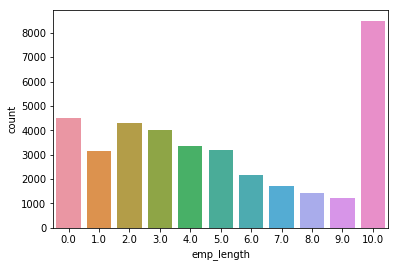

In [31]:
sns.countplot(x='emp_length', data=df)
plt.show()

Observation : Most of the loans are issued either to people with more than 10 years of experience or early in their job (upto 3 years of experience)

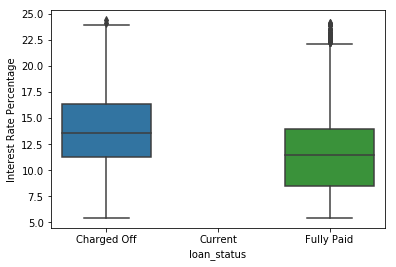

In [32]:
sns.boxplot(y='int_rate', x='loan_status', data=df)
plt.ylabel('Interest Rate Percentage')
plt.show()

Conclusion : Its very clear that higher interest rate leading to many charge offs

### Segmented Univariate Analysis

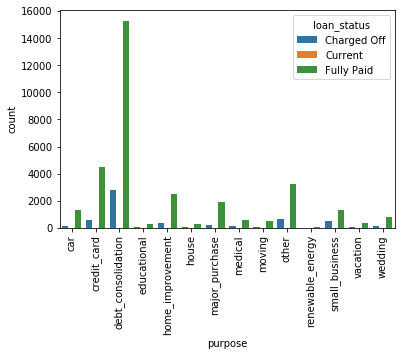

In [33]:
sns.countplot(x='purpose', hue="loan_status", data=df)
plt.xticks(rotation=90)
plt.show()

Conclusion: About 50% of default under debt consolidation, it is as a result of majority of loans being sanctioned for the purpose of debt consolidation. On the other hand, only a small portion of loans are sanctioned for small businesses, more than 20% of these are charged off as oppose to about 15% with debt consolidation. Therefore, loans for small businesses should be approved with caution.

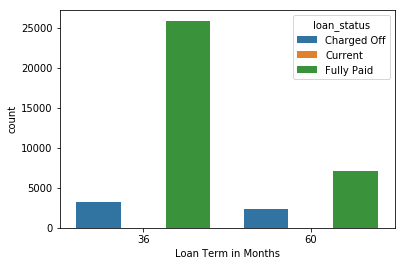

In [34]:
sns.countplot( x="term", hue='loan_status', data=df)
plt.xlabel('Loan Term in Months')
plt.show()

Conclusion: if we observe the number of loans, we found that majority of loans are given for a term of 36 months. After, looking at loan_status , we find that higher proportion of 60 month loan are charged off compared to 36 month. It seems 60 month loans are more risky and therefore are rightfully issued sparingly.

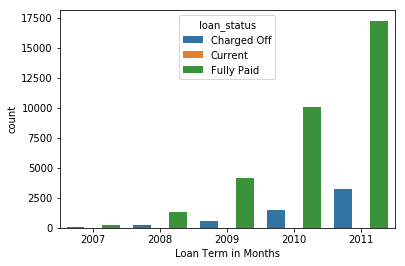

In [35]:
sns.countplot( x="issue_d_year", hue='loan_status', data=df)
plt.xlabel('Loan Term in Months')
plt.show()

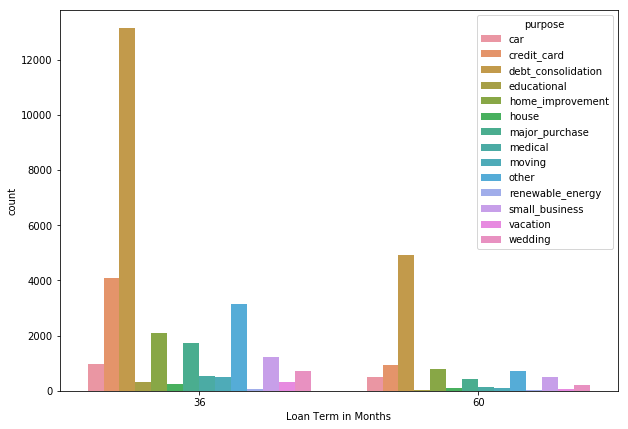

In [36]:
plt.figure(figsize=(10,7))
sns.countplot( x="term", hue='purpose', data=df)
plt.xlabel('Loan Term in Months')
plt.show()

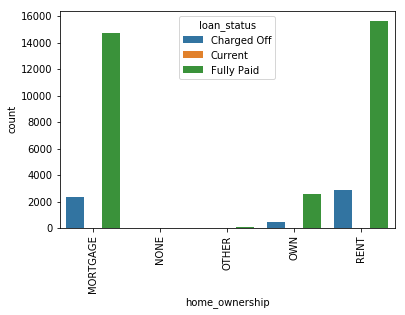

In [37]:
sns.countplot(x='home_ownership',hue='loan_status', data=df)
plt.xticks(rotation=90)
plt.show()

Conclusion: Mortgage and Rent people are more likely to pay based on the Fully Paid and Charged Off percentages. But Own house customers are less likely to pay. But does not seem very strong factor.

### Bivariate Plots

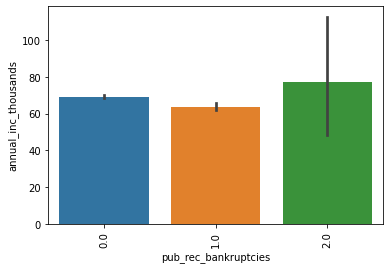

In [23]:
sns.barplot(y='annual_inc_thousands', x='pub_rec_bankruptcies', data=df)
plt.xticks(rotation=90)
plt.show()

In [33]:
pt_pub_rec_bankruptcies  = df.pivot_table(columns='pub_rec_bankruptcies', values=['Fully_Paid','Charged_Off'], aggfunc='sum')
pt_pub_rec_bankruptcies

pub_rec_bankruptcies,0.0,1.0,2.0
Charged_Off,5141,366,2
Fully_Paid,31097,1271,3


<AxesSubplot:xlabel='pub_rec_bankruptcies'>

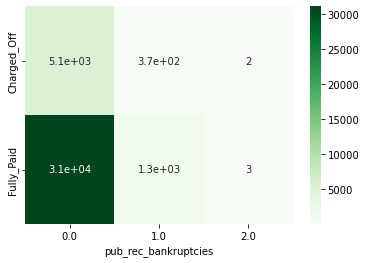

In [34]:
sns.heatmap(pt_pub_rec_bankruptcies, cmap="Greens", annot=True)

Conclusion: Looks very strong indicator that 0 times bankrupted customers very likely to pay, 1 time is okay but risky and 2 times is very much unlikely to pay

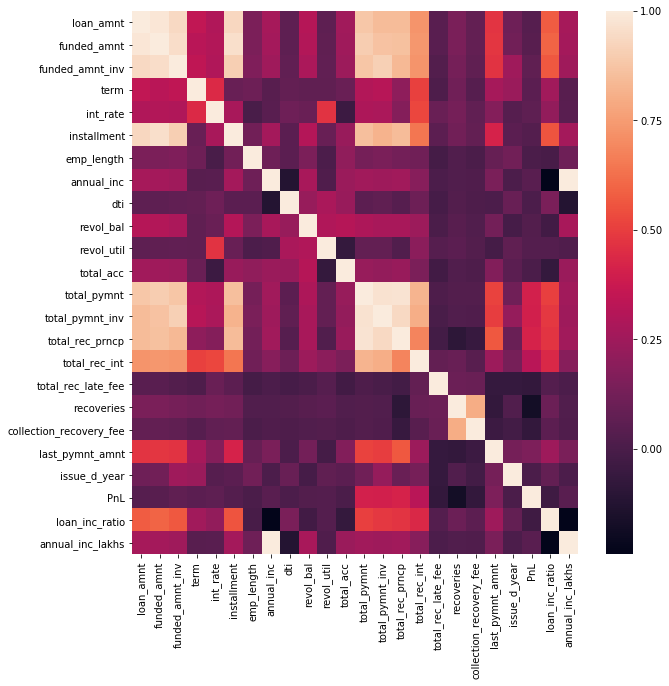

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())
plt.show()

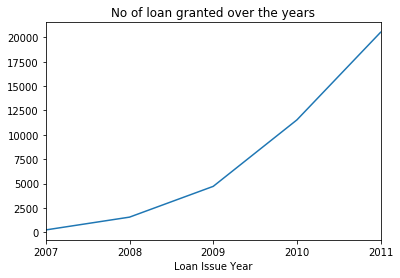

In [40]:
g = df.groupby('issue_d_year')['loan_status'].count()

g.plot.line(x_compat=True)
plt.xticks(np.arange(min(g.index), max(g.index)+1, 1.0))
plt.title('No of loan granted over the years')
plt.xlabel('Loan Issue Year')
plt.show()

Loan Applicants have been increasing exponentially from year 2007 to 2011

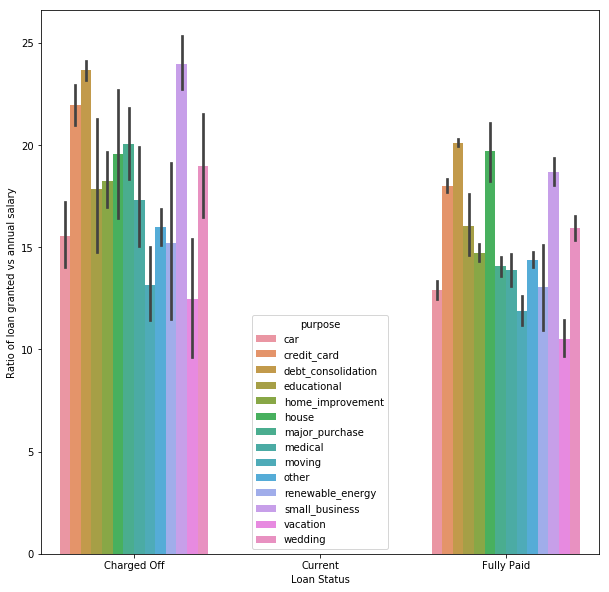

In [41]:
plt.figure(figsize=(10,10))

sns.barplot(x='loan_status',y='loan_inc_ratio',hue='purpose',data=df)
plt.xlabel('Loan Status')
plt.ylabel('Ratio of loan granted vs annual salary')
plt.show()

In [41]:
# dti_category
pt_dti_category  = df.pivot_table(columns='dti_category', values=['Fully_Paid','Charged_Off'], aggfunc='sum')
pt_dti_category

dti_category,0 to 5,05 to 10,10 to 15,15 to 20,20 to 25,25 to 30
Charged_Off,642,1000,1394,1386,1118,87
Fully_Paid,4511,6843,8200,7402,5458,536


In [38]:
# loan_inc_ratio
pt_loan_inc_ratio_range  = df.pivot_table(columns='loan_inc_ratio_range', values=['Fully_Paid','Charged_Off'], aggfunc='sum')
pt_loan_inc_ratio_range

loan_inc_ratio_range,high,low,medium,veryhigh,verylow
Charged_Off,1393,1080,1139,1914,101
Fully_Paid,8374,8450,8439,7069,618


<AxesSubplot:xlabel='loan_inc_ratio_range'>

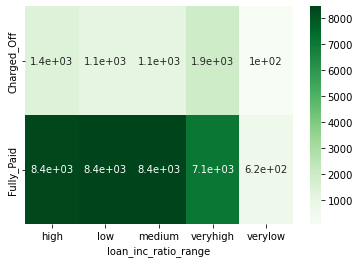

In [39]:
sns.heatmap(pt_loan_inc_ratio_range, cmap="Greens", annot=True)

### Conclusion: "Very high" loan_inc_ratio_range or dti range customers are less likey to pay as it is clearly visible difference. Charge Off became darker and Fully Paid became lighter at this range